In [1]:
import os
os.chdir('..')

In [2]:
import scipy.misc
import cv2

from matplotlib import pyplot as plt

In [3]:
from data_icdar2013 import GTUtility
gt_util = GTUtility('data/ICDAR2013', test=False)
img_path = gt_util.image_path

### scipy

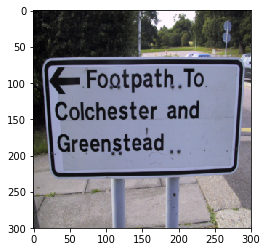

In [4]:
img = scipy.misc.imread(img_path+'/100.jpg').astype('float32')
img = scipy.misc.imresize(img, (300,300))
plt.imshow(img/255.)
plt.show()

In [5]:
%%time
for k in gt_util.image_names:
    img = scipy.misc.imread(img_path+'/'+k).astype('float32')
    img = scipy.misc.imresize(img, (300,300))

CPU times: user 10.7 s, sys: 1.99 s, total: 12.7 s
Wall time: 12.7 s


### opencv

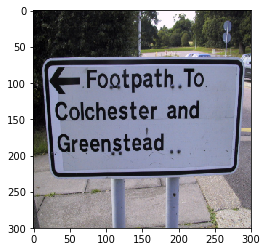

In [6]:
img = cv2.imread(img_path+'/100.jpg').astype('float32')
img = img[:,:,(2,1,0)] # BGR to RGB, but takes half of the time
img = cv2.resize(img, (300,300))
plt.imshow(img/255.)
plt.show()

In [7]:
%%time
for k in gt_util.image_names:
    img = cv2.imread(img_path+'/'+k).astype('float32')
    img = img[:,:,(2,1,0)] # BGR to RGB, but takes half of the time
    img = cv2.resize(img, (300,300))

CPU times: user 5.24 s, sys: 804 ms, total: 6.04 s
Wall time: 5.58 s


### Preprocessing

In [8]:
from ssd_data import preprocess_image

img_path = './pics/fish-bike.jpg'
size = (300,300)

for lib in ['pil', 'scipy', 'opencv', 'skimage']:
    img = preprocess_image(img_path, size, lib=lib)

In [9]:
%%timeit
img = preprocess_image(img_path, size, lib='pil')

3.51 ms ± 7.07 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [10]:
%%timeit
img = preprocess_image(img_path, size, lib='scipy')

5.11 ms ± 4.26 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [11]:
%%timeit
img = preprocess_image(img_path, size, lib='opencv')

2.22 ms ± 5.22 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [12]:
%%timeit
img = preprocess_image(img_path, size, lib='skimage')

8.65 ms ± 14.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
